In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
# import astropy.units as u

# import gala.coordinates as gc

In [10]:
plt.style.use('si_lgray_ucondensed')

In [11]:
t = Table(fits.getdata('../data/legacysurvey-bricks-dr7.fits.gz'))

In [12]:
ind = (t['ra']>215) & (t['ra']<250) & (t['dec']>-10) & (t['dec']<10)
t = t[ind]

In [22]:
tin = Table(fits.getdata('../data/pal5_ls_lite_grz.fits'))

In [23]:
tflag = Table.read('../data/cmd_masks_orig.fits')

In [24]:
tp = tin[tflag['gr_mask'] & tflag['grz_mask']]

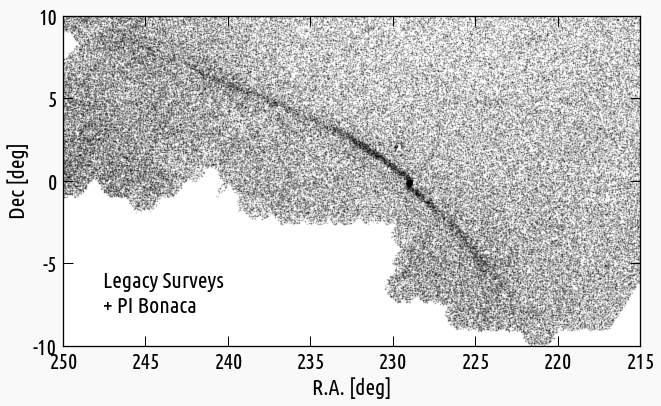

In [16]:
plt.figure(figsize=(10,6))

# im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_g'], 
#                 s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
plt.plot(tp['ra'], tp['dec'], 'k.', ms=1, alpha=0.2)

plt.text(0.07, 0.1, 'Legacy Surveys\n+ PI Bonaca', transform=plt.gca().transAxes)

plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
plt.gca().set_aspect('equal')
plt.xlim(250,215)
plt.ylim(-10,10)

plt.tight_layout()
plt.savefig('../plots/lgray_ucon/pal5.png', dpi=200)

In [52]:
pal5_mask = (tin['ra']-229)**2 + (tin['dec']+0.1)**2<0.2**2

points_sky = np.array([tin['ra'], tin['dec']]).T
poly_fan = np.array([[223.5, -5.5], [225.3, -5.5], [224.8, -8.5], [221.5, -8.5]])
path_fan = mpl.path.Path(poly_fan)
fan_mask = path_fan.contains_points(points_sky)

poly_trail = np.array([[240, 5.5], [240, 6.5], [237, 5.1], [237, 4.1]])
path_trail = mpl.path.Path(poly_trail)
trail_mask = path_trail.contains_points(points_sky)

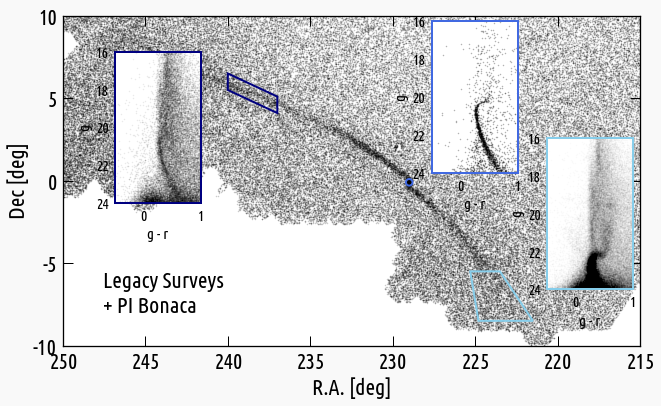

In [96]:
plt.figure(figsize=(10,6))

plt.plot(tp['ra'], tp['dec'], 'k.', ms=1, alpha=0.2)

pcirc = mpl.patches.Circle((229,-0.1), radius=0.2, color='none', ec='royalblue', lw=2, alpha=1, zorder=2, label='')
plt.gca().add_artist(pcirc)

pfan = mpl.patches.Polygon(poly_fan, color='none', ec='skyblue', lw=2, alpha=1, zorder=2, label='')
plt.gca().add_artist(pfan)

ptrail = mpl.patches.Polygon(poly_trail, color='none', ec='navy', lw=2, alpha=1, zorder=2, label='')
plt.gca().add_artist(ptrail)

plt.text(0.07, 0.1, 'Legacy Surveys\n+ PI Bonaca', transform=plt.gca().transAxes)

plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
plt.gca().set_aspect('equal')
plt.xlim(250,215)
plt.ylim(-10,10)

plt.tight_layout()

ax1 = plt.axes([0.2,0.5,0.12,0.35])
ax2 = plt.axes([0.64,0.57,0.12,0.35])
ax3 = plt.axes([0.8,0.3,0.12,0.35])

ax_list = [ax1, ax2, ax3]
alphas = [0.08, 0.3, 0.02]
colors = ['navy', 'royalblue', 'skyblue']

for e, mask in enumerate([trail_mask, pal5_mask, fan_mask]):
    plt.sca(ax_list[e])
    plt.plot(tin['g'][mask]-tin['r'][mask], tin['g'][mask], 'k.', ms=1, alpha=alphas[e])

    plt.xlim(-0.5,1)
    plt.ylim(24,16)
    plt.xlabel('g - r', fontsize=15)
    plt.ylabel('g', fontsize=15)
    
    plt.gca().tick_params(axis='both', which='major', labelsize=15, length=0)
    for spine in plt.gca().spines.values():
        spine.set_edgecolor(colors[e])
        spine.set_linewidth(2)
plt.savefig('../plots/lgray_ucon/pal5_cmd.png', dpi=200)

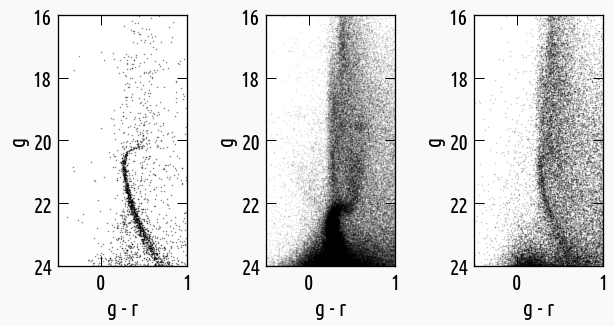

In [57]:
alphas = [0.5, 0.1,0.2]

fig, ax = plt.subplots(1,3,figsize=(9,5))
for e, mask in enumerate([pal5_mask, fan_mask, trail_mask]):
    plt.sca(ax[e])
    plt.plot(tin['g'][mask]-tin['r'][mask], tin['g'][mask], 'k.', ms=1, alpha=alphas[e])

    plt.xlim(-0.5,1)
    plt.ylim(24,16)
    plt.xlabel('g - r')
    plt.ylabel('g')
plt.tight_layout()

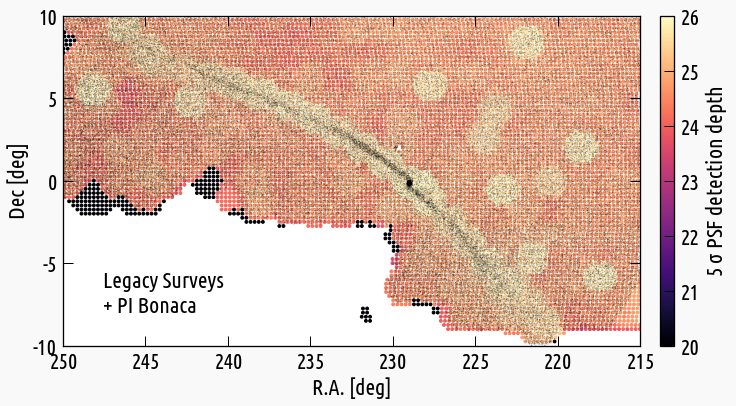

In [36]:
fig = plt.figure(figsize=(10,6))

im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_g'], 
                s=8, vmin=20, vmax=26, cmap='magma', rasterized=True)
plt.plot(tp['ra'], tp['dec'], 'k.', ms=0.5, alpha=0.2)

plt.text(0.07, 0.1, 'Legacy Surveys\n+ PI Bonaca', transform=plt.gca().transAxes)

plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
plt.gca().set_aspect('equal')
plt.xlim(250,215)
plt.ylim(-10,10)

plt.tight_layout()

[[x00,y10],[x11,y01]] = plt.gca().get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth');

plt.savefig('../plots/pal5_depth.png', dpi=200)

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(13,11.5), sharex=True, sharey=True)

for e, b in enumerate(['g', 'r', 'z']):
    plt.sca(ax[e][0])
    
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.xlim(250, 215)
    plt.ylim(-10, 10)
    plt.ylabel('Dec [deg]')
    plt.gca().set_aspect('equal')
    
    plt.sca(ax[e][1])
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.plot(tp['ra'], tp['dec'], 'k.', ms=0.5, alpha=0.1)

plt.xlabel('R.A. [deg]')
plt.sca(ax[2,0])
plt.xlabel('R.A. [deg]')
plt.tight_layout(h_pad=0.1)

[[x00,y00],[x01,y01]] = ax[0,1].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2,1].get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth')


plt.savefig('../plots/ls_brick_depth_26.png', dpi=200)